In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("tcp-connection.csv")

# Understanding the Dataset

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [5]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
#get numerical columns
num_cols = data._get_numeric_data().columns
data[num_cols]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,44,134,0,0,0,0,0,0,0,...,139,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0
1,0,1489,385,0,0,0,0,0,1,0,...,5,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0
2,0,1032,0,0,0,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
3,0,1032,0,0,0,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,255,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,0,0,0,0,0,0,0,0,0,...,255,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0
494017,0,1032,0,0,0,0,0,0,0,0,...,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
494018,0,2152,327,0,0,0,0,0,1,0,...,135,123,0.91,0.02,0.01,0.00,0.0,0.0,0.0,0.0
494019,0,283,1270,0,0,0,0,0,1,0,...,7,255,1.00,0.00,0.14,0.06,0.0,0.0,0.0,0.0


In [7]:
# get categorical columns
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
data[cat_cols]

,protocol_type,service,flag,intrusion
0,b'udp',b'domain_u',b'SF',b'normal.'
1,b'tcp',b'smtp',b'SF',b'normal.'
2,b'icmp',b'ecr_i',b'SF',b'smurf.'
3,b'icmp',b'ecr_i',b'SF',b'smurf.'
4,b'tcp',b'private',b'S0',b'neptune.'
...,...,...,...,...
494016,b'tcp',b'private',b'S0',b'neptune.'
494017,b'icmp',b'ecr_i',b'SF',b'smurf.'
494018,b'tcp',b'smtp',b'SF',b'normal.'
494019,b'tcp',b'http',b'SF',b'normal.'


In [8]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

In [9]:
data[['duration', 'src_bytes']].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.979302,707.746472,0.0,0.0,0.0,0.0,58329.0
src_bytes,494021.0,3025.610296,988218.101047,0.0,45.0,520.0,1032.0,693375640.0


In [10]:
data[['num_failed_logins', 'logged_in', 'is_host_login',
       'is_guest_login', 'count',]].describe().T

,count,mean,std,min,25%,50%,75%,max
num_failed_logins,494021.0,0.000152,0.015520,0.0,0.0,0.0,0.0,5.0
logged_in,494021.0,0.148247,0.355345,0.0,0.0,0.0,0.0,1.0
is_host_login,494021.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
is_guest_login,494021.0,0.001387,0.037211,0.0,0.0,0.0,0.0,1.0
count,494021.0,332.285690,213.147412,0.0,117.0,510.0,511.0,511.0


In [11]:
data['intrusion'].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

In [12]:
data['intrusion'].value_counts(normalize=True)

b'smurf.'              0.568377
b'neptune.'            0.216997
b'normal.'             0.196911
b'back.'               0.004459
b'satan.'              0.003216
b'ipsweep.'            0.002524
b'portsweep.'          0.002105
b'warezclient.'        0.002065
b'teardrop.'           0.001982
b'pod.'                0.000534
b'nmap.'               0.000468
b'guess_passwd.'       0.000107
b'buffer_overflow.'    0.000061
b'land.'               0.000043
b'warezmaster.'        0.000040
b'imap.'               0.000024
b'rootkit.'            0.000020
b'loadmodule.'         0.000018
b'ftp_write.'          0.000016
b'multihop.'           0.000014
b'phf.'                0.000008
b'perl.'               0.000006
b'spy.'                0.000004
Name: intrusion, dtype: float64

In [13]:
data['protocol_type'].value_counts()

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64

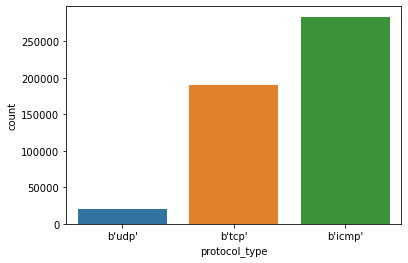

In [14]:
sns.countplot(data['protocol_type'])
plt.show()

In [15]:
data['flag'].value_counts()

b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64

In [16]:
data['service'].value_counts()

b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'tftp_u'          1
b'pm_dump'         1
b'red_i'           1
Name: service, Length: 66, dtype: int64

C:\Users\public\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


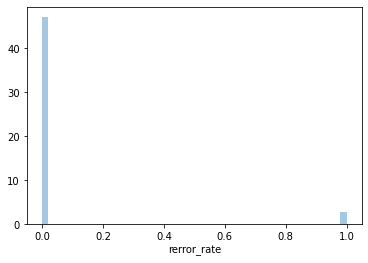

In [17]:
sns.distplot(data['rerror_rate'])


In [18]:
#splitting into target and feature columns
x = data[['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']]

y = data['intrusion']

In [37]:
#one hot encoding
x=pd.get_dummies(x)

In [20]:
x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_b'REJ',flag_b'RSTO',flag_b'RSTOS0',flag_b'RSTR',flag_b'S0',flag_b'S1',flag_b'S2',flag_b'S3',flag_b'SF',flag_b'SH'
0,0,44,134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1489,385,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
x.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
duration,494021.0,47.98,707.75,0.0,0.0,0.0,0.0,58329.0
src_bytes,494021.0,3025.61,988218.10,0.0,45.0,520.0,1032.0,693375640.0
dst_bytes,494021.0,868.53,33040.00,0.0,0.0,0.0,0.0,5155468.0
land,494021.0,0.00,0.01,0.0,0.0,0.0,0.0,1.0
wrong_fragment,494021.0,0.01,0.13,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
flag_b'S1',494021.0,0.00,0.01,0.0,0.0,0.0,0.0,1.0
flag_b'S2',494021.0,0.00,0.01,0.0,0.0,0.0,0.0,1.0
flag_b'S3',494021.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0
flag_b'SF',494021.0,0.77,0.42,0.0,1.0,1.0,1.0,1.0


In [22]:
data[num_cols].columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [38]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x.loc[:,num_cols] = sc.fit_transform(x[num_cols])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2,
                                                    random_state=132)

# Model Buliding

In [25]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

C:\Users\public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991093568139264

In [26]:
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

Weighted F1-score: 1.00


In [27]:
## knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.9990992358686301

In [28]:
### svm
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)
y_pred = sv.predict(x_test)
accuracy_score(y_test, y_pred)

0.9991802034310004

In [29]:
#### decision trees    # no scaling 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.9995647993522595

In [30]:
##### voting classifier
from sklearn.ensemble import VotingClassifier
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=13)
sv = SVC()
classifiers = [("log_reg",lr),("knn",knn),("svm",sv)]

vc = VotingClassifier(estimators=classifiers)
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)
accuracy_score(y_test, y_pred)

C:\Users\public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991700824857042

In [31]:
###### bagging classifier 
bs_et = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(base_estimator=bs_et, n_estimators= 200)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)
accuracy_score(y_test, y_pred)

0.999686250695815

In [32]:
####### random forest classifier
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier()
rt.fit(x_train, y_train)
y_pred = rt.predict(x_test)
accuracy_score(y_test, y_pred)

0.9997773392034816

In [33]:
#cross validated random forest

from sklearn.model_selection import cross_val_score
rt = RandomForestClassifier()

cv_results = cross_val_score(rt, x, y, cv = 5, scoring="accuracy")
cv_results.mean()



C:\Users\public\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.9997692406648829

In [34]:
#cross validated decision tree

from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier()

cv_results = cross_val_score(dt, x, y, cv = 5, scoring="accuracy")
cv_results.mean()


C:\Users\public\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.9996336190964886

In [35]:
#cross validated KNN

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=13)

cv_results = cross_val_score(knn, x, y, cv = 5, scoring="accuracy")
cv_results.mean()




C:\Users\public\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.9992348504714739